In [2]:
# EDA: Exploratory Data Analysis for hourly weather.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import os
print("[INFO] Current working directory:", os.getcwd())
# Display configuration
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Read data
file_path = Path("../data/processed/full_hourly_weather.csv")
df = pd.read_csv(file_path, parse_dates=["date"])
print("[INFO] Data loaded:", df.shape)

[INFO] Current working directory: c:\Users\ADMIN\MyProject\School_Projects\WeatherForecastML-DM\notebooks
[INFO] Data loaded: (747768, 50)


In [ ]:
#1. View overall information
print("\n[INFO] Data types:")
print(df.dtypes)
print("\n[INFO] First rows:")
print(df.head())


[INFO] Data types:
date                                    datetime64[ns, UTC]
temperature_2m                                      float64
relative_humidity_2m                                float64
dew_point_2m                                        float64
apparent_temperature                                float64
precipitation                                       float64
rain                                                float64
snowfall                                            float64
snow_depth                                          float64
weather_code                                        float64
pressure_msl                                        float64
surface_pressure                                    float64
cloud_cover                                         float64
cloud_cover_low                                     float64
cloud_cover_mid                                     float64
cloud_cover_high                                    float64
et0_fao_evapotranspi

In [ ]:
# 2. Checking missing value
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing, "missing_%": missing_percent})
missing_df = missing_df[missing_df["missing_count"] > 0].sort_values(by="missing_count", ascending=False)
print("\n[INFO] Missing values:")
print(missing_df)


[INFO] Missing values:
                                      missing_count  missing_%
albedo                                       747768     100.00
snow_depth_water_equivalent                  747768     100.00
snow_depth                                    88273      11.80
boundary_layer_height                          4375       0.59
total_column_integrated_water_vapour           4375       0.59
precipitation                                    14       0.00
direct_normal_irradiance_instant                 14       0.00
diffuse_radiation_instant                        14       0.00
wind_gusts_10m                                   14       0.00
et0_fao_evapotranspiration                       14       0.00
snowfall                                         14       0.00
weather_code                                     14       0.00
rain                                             14       0.00
direct_normal_irradiance                         14       0.00
global_tilted_irradiance_instan

{
    "temperature_2m": {
        "strong_positive": [
            ["dew_point_2m", 0.859],
            ["apparent_temperature", 0.984],
            ["soil_temperature_0_to_7cm", 0.986],
            ["soil_temperature_7_to_28cm", 0.886],
            ["wet_bulb_temperature_2m", 0.938]
        ],
        "strong_negative": [
            ["pressure_msl", -0.823],
            ["surface_pressure", -0.821]
        ]
    },
    "relative_humidity_2m": {
        "strong_positive": [
        ],
        "strong_negative": [
            ["vapour_pressure_deficit", -0.822]
        ]
    },
    "dew_point_2m": {
        "strong_positive": [
            ["temperature_2m", 0.859],
            ["apparent_temperature", 0.922],
            ["soil_temperature_0_to_7cm", 0.859],
            ["soil_temperature_7_to_28cm", 0.888],
            ["wet_bulb_temperature_2m", 0.982],
            ["total_column_integrated_water_vapour", 0.838]
        ],
        "strong_negative": [
            ["pressure_msl", -0

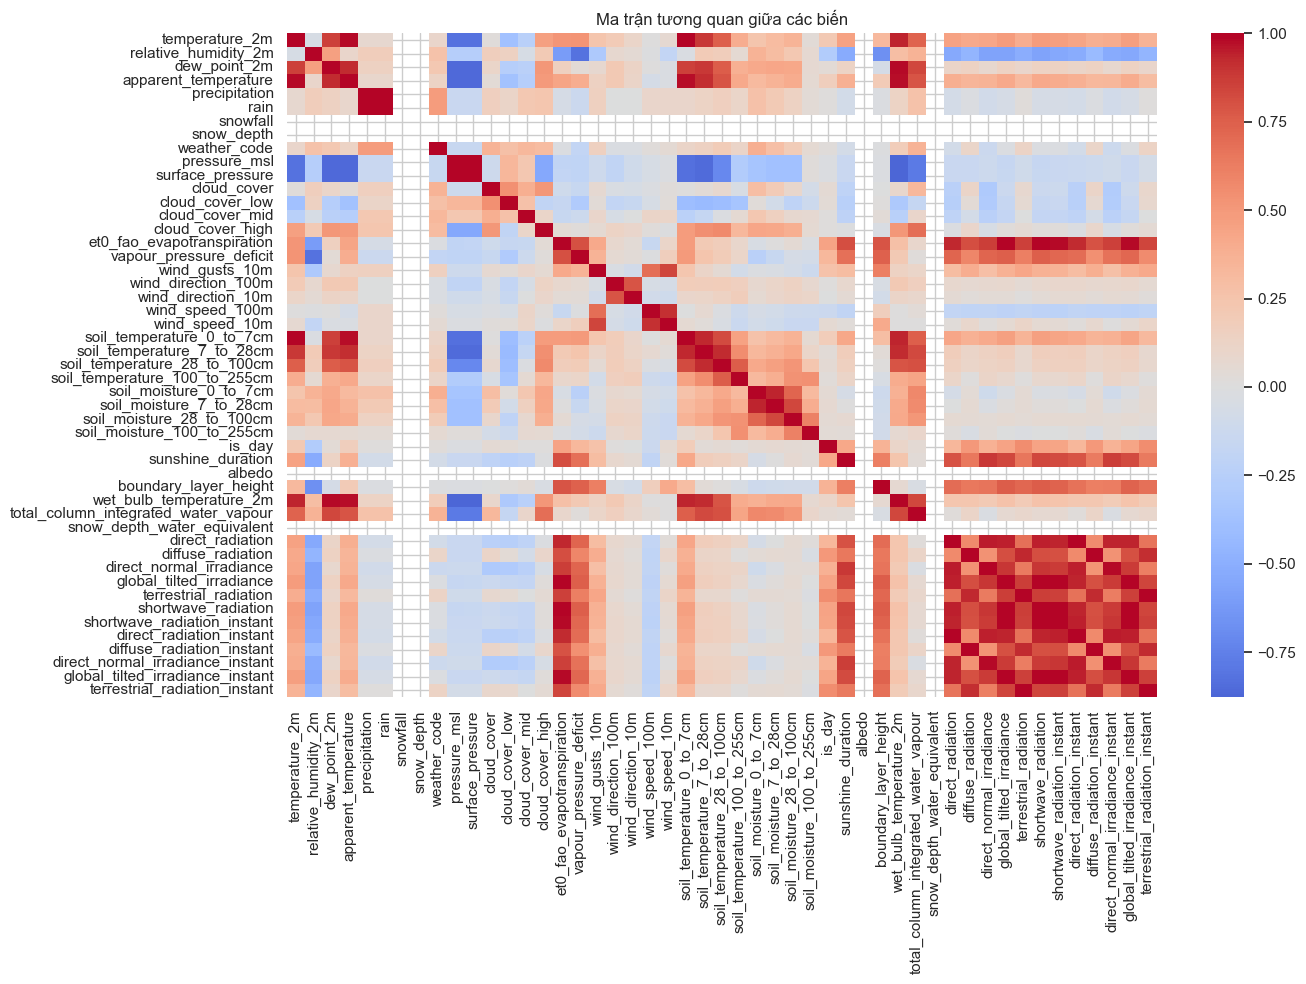

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

# df là DataFrame
cor = df.corr(numeric_only=True)

# Ngưỡng tương quan mạnh
threshold = 0.8

# Tạo dictionary mới
correlation_dict = {}

# Duyệt qua từng biến (theo cột) trong ma trận tương quan
for var1 in cor.columns:
    # Khởi tạo cho mỗi biến, tách thành 2 nhóm: mạnh dương và mạnh âm
    correlation_dict[var1] = {"strong_positive": [], "strong_negative": []}
    for var2 in cor.columns:
        if var1 == var2:
            continue  # Bỏ qua khi var1 và var2 là chính nó
        
        # Lấy và làm tròn giá trị tương quan
        corr_value = round(cor.loc[var1, var2], 3)
        # Kiểm tra nếu độ lớn của tương quan vượt qua ngưỡng
        if abs(corr_value) > threshold:
            if corr_value > 0:
                correlation_dict[var1]["strong_positive"].append([var2, corr_value])
            elif corr_value < 0:
                correlation_dict[var1]["strong_negative"].append([var2, corr_value])

# Hàm tùy chỉnh in JSON đẹp
def custom_json_dump_pretty(data):
    result = "{\n"
    for key, value in data.items():
        result += f'    "{key}": {{\n'

        for sub_key in ["strong_positive", "strong_negative"]:
            result += f'        "{sub_key}": [\n'
            for pair in value[sub_key]:
                result += f'            ["{pair[0]}", {pair[1]}],\n'
            if value[sub_key]:
                result = result.rstrip(",\n") + "\n"  # Xoá dấu phẩy cuối
            result += "        ],\n"

        result = result.rstrip(",\n") + "\n    },\n"
    result = result.rstrip(",\n") + "\n}"
    return result



# In kết quả
print(custom_json_dump_pretty(correlation_dict))

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(14, 10))
sns.heatmap(cor, cmap="coolwarm", center=0)
plt.title("Ma trận tương quan giữa các biến")
plt.tight_layout()
plt.show()
